# Исследование определяющих успешность игры закономерностей

Задача от интернет-магазина, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Необходимо планировать кампанию на 2017-й год. Нужно отработать принцип работы с данными. 

### **Цель исследования**: 

**Выявить определяющие успешность игры закономерности**

 

### Ход исследования:

  Данные о продажах я получу из файла `/datasets/games.csv`, о качестве данных ничего не известно. Перед началом исследования нужен обзор данных и их обработка.

  Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки поищу возможность исправить все возможные ошибки данных, которые не повредят качеству исследования, приведу наименовая и прочие названия к общему виду. Далее, создам необходимые столбцы, и приступлю к исследованию.

  Таким образом, мое исследовние пройдет в **шесть этапов:**

  1. Обзор данных;
  2. Подготовка данных;
  3. Проведение исследовательского анализа данных;
  4. Составлю портрет пользователя каждого региона;
  5. Проверю гипотезы;
  6. Напишу общий вывод


#### Описание колонок

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Обзор данных 

#### Импорт нужных библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

In [2]:
# открываю файл
data = pd.read_csv('games.csv')

# вывожу первые 10 строк
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# смотрю общую информацию
display(data.info(memory_usage='deep'))

# кол-во строк и столбцов
print(f'Строк: {data.shape[0]}', 
      '\n'f'Столбцов: {data.shape[1]}'
     )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 5.6 MB


None

Строк: 16715 
Столбцов: 11


<div style="border:solid black 5px; padding: 10px">
   <br /> 
<font size="4"><b>Выводы по датасету:</b></font>

* Датасет содержит 16_715 строк и 11 столбцов;
* Датасет имеет два типа данных float и object, целочисленных данных нет;
* последние три столбца содержат значительное количество пустых значений;
* Используемая память 5.6 MB
    <br />
   </div>  

## Предобработка данных

### Изменение названий столбцов

In [4]:
# привожу названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍 Не которые пишут длинный словарь для замены колонок.</font>

### Изменение типов данных

**`year_of_release`:**

In [5]:
# year_of_release приводим к целочисленному типу
data['year_of_release'] = data['year_of_release'].astype('Int64')



**`critic_score`:**

In [6]:
# critic_score приводим к целочисленному типу
data['critic_score'] = data['critic_score'].astype('float64')

**`user_score`:**

In [7]:
# заменяем tbd в user_score на NaN чтобы можно было изменит
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

# critic_score приводим к целочисленному типу сделаем 100 балльной как critic_score
data['user_score'] = data['user_score'].astype('float64') * 10

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


<div style="border:solid black 5px; padding: 10px">
   
<font size="4"><b>Что сделано:</b></font>
    
   
* Год релиза сделал просто целочисленным, так как там год без месяцев и дней;
* Оценки критиков оставил float;
* Оценки пользователей также привел к 100 балльной шкале чтобы было легче сравнивать с оценками от критиков
    
Значение "tbd" из столбца user_score перевел в NaN, так как "tbd" относится не только к новым играм и по факту это то же отсутвие рейтинга. 

Исследовав данные выяснил, что значение "tbd" равномерно распределено по всем годам.

   
   </div>  




### Работа с пропусками

#### Обзор пропусков

In [8]:
# вывожу твблицу с пустыми значениями
na = data.isna().sum()
na_perc = round((data.isna().mean() * 100), 2)

display(pd.
        DataFrame({'Кол-во пропусков':na, 
                   '% пропусков':na_perc}).
        style.format('{:.2f}').
        background_gradient('coolwarm'))

# описываю колонки по пропускам
print('Всего колонок: {}, без пропусков: {}, с пропусками: {}'.format(len(na), (na == 0).sum(), (na != 0).sum() ))

,Кол-во пропусков,% пропусков
name,2.00,0.01
platform,0.00,0.00
year_of_release,269.00,1.61
genre,2.00,0.01
na_sales,0.00,0.00
eu_sales,0.00,0.00
jp_sales,0.00,0.00
other_sales,0.00,0.00
critic_score,8578.00,51.32
user_score,9125.00,54.59


Всего колонок: 11, без пропусков: 5, с пропусками: 6


#### Заполнение пропусков

**`name`:** назваиние игры

In [9]:
# удалим 2 безымяные игры
data = data.query('~name.isna()')

**`year_of_release`:** год выхода

In [10]:
# удалим игры без указания даты выхода
data = data.query('~year_of_release.isna()')
data['year_of_release'] = data['year_of_release'].astype('int64')

**`rating`:** возрастной рейтинг

In [11]:
# заполним пропуски в возрастном рейтинге
data['rating'] = data['rating'].fillna('Unknown')

<div style="border:solid black 5px; padding: 10px">
   
<font size="4"><b>Что сделано:</b></font>
* Удалил 2 безымяные игры из данных;
* Удалил игры без указания года релиза;
* В возрастном рейтинге заменил отсутствующие знаяения на "Unknown"
</div>

### Работа с дубликатами

#### Явные дубликаты

In [12]:
# проверка явных дупликатов
data.duplicated().sum()

0

<div style="border:solid black 5px; padding: 10px">
   
<font size="4"><b>Вывод:</b></font>

Явных дубликатов нет
    </div>

#### Неявные дубликаты жанров

In [13]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

<div style="border:solid black 5px; padding: 10px">
   
<font size="4"><b>Вывод:</b></font>


Неявные дубликаты могли быть в столбце `genre`, но их там не оказалось. 

Датасет без дупликатов.
    </div>

**Общий столбец для всех продаж**

In [14]:
# создаю общий столбец для суммы всех продаж
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

# передвинем столбец ближе к другим
data = data[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'rating']]

#### Вывод по предобработке данных

<div style="border:solid black 5px; padding: 10px">
   
<font size="4"><b>Что сделано:</b></font>

**1) Работа с типам данных**

* Тип данных `year_of_release` переведен в целочисленное (`int`); 
    
    Можно было перевести во временный тип, но так как год без месяца и дня, то целочисленное тоже подойдет.


* `user_score` переведен в целочисленное (`float`) и 100 балльную шкалу;
    
    Пользовательская оценка приведен к виду оценок критиков, чтобы было удобнее их сравнивать.


* значения "tbd" из `user_score` заменены на NaN, так как они не дают оценку и мешают при расчетах
    
    Исследование показали, что "tbd" относиться не только к новым играм. Это значения равномерно распределено по годам.
    
**2) Работа с пропусками**

* `name`: удалил 2 игры без названия. 
    
    Пропуск мог произойти из-за технических или человеческих факторов.
    

* `year_of_release`: удалил игры без указания года релиза. Их было мало чуть больше 1.5%.
    
    Также пропуск мог произойти из-за технических или человеческих факторов.
    

* `critic_score`: оставил без изменений. Не нашел логику для для заполнения средним, медианой или 0. 
    
    Пропуски могли произойти из-за того, что не было достаточного количества оценок, чтобы считаться с ними.


* `user_score`: оставил без изменений.

    Пропуски также могли произойти из-за того, что не было достаточного количества оценок, чтобы считаться с ними.
    

* `rating`: пропуски заполнил "Unknown".    

    Пропуски могли получиться просто из-за того что ESRB предназначен для США и Канады, и соответсвенно мог проигнорировать игры для других стран.


**3) Дубликаты**

Дубликаты не обнаружены.


**4) Новый столбец**

Создан новый столбец с суммарной продажей по всем регионам.
    </div>

##  Исследовательский анализ данных

### Игры по годам

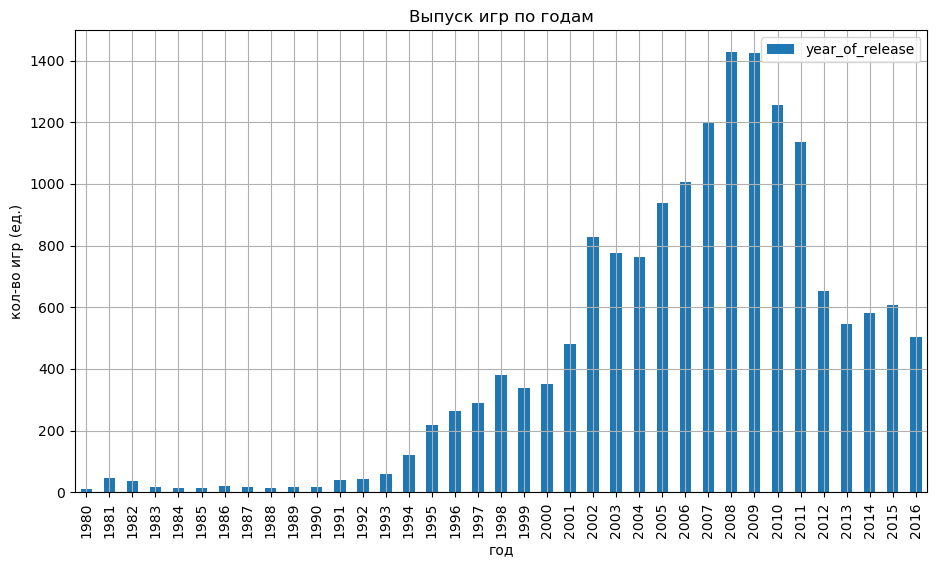

In [15]:
sns.set_style()

# создаем таблицу с кол-вом игр по годам
games_per_year =(data
                 .groupby(by='year_of_release')
                 .agg({'year_of_release':'count'}))

# создаем столбчатый график
games_per_year.plot(kind='bar', 
                    title='Выпуск игр по годам', 
                    xlabel='год', 
                    ylabel='кол-во игр (ед.)', 
                    grid=True, 
                    figsize=(11, 6) 
                           )
# создаем новую таблицу с играми от 1995 года
new_games = data.loc[data['year_of_release'] > 1994]

<div style="border:solid black 5px; padding: 10px">
   
<font size="4"><b>Вывод:</b></font>

Видеоигры стремительно начали развиваться к серидине 90х и продолжили свой рост до 2008-2009 гг., после чего количесвто игр по годам сократилась в двое. Думаю можно убрать игры до 1995 из анализа.
    

### Продажи по платформам

#### Популярные платформы

<AxesSubplot:title={'center':'Сумма продаж по платформам'}, xlabel='Платформы', ylabel='Сумма продаж, млн копиий'>

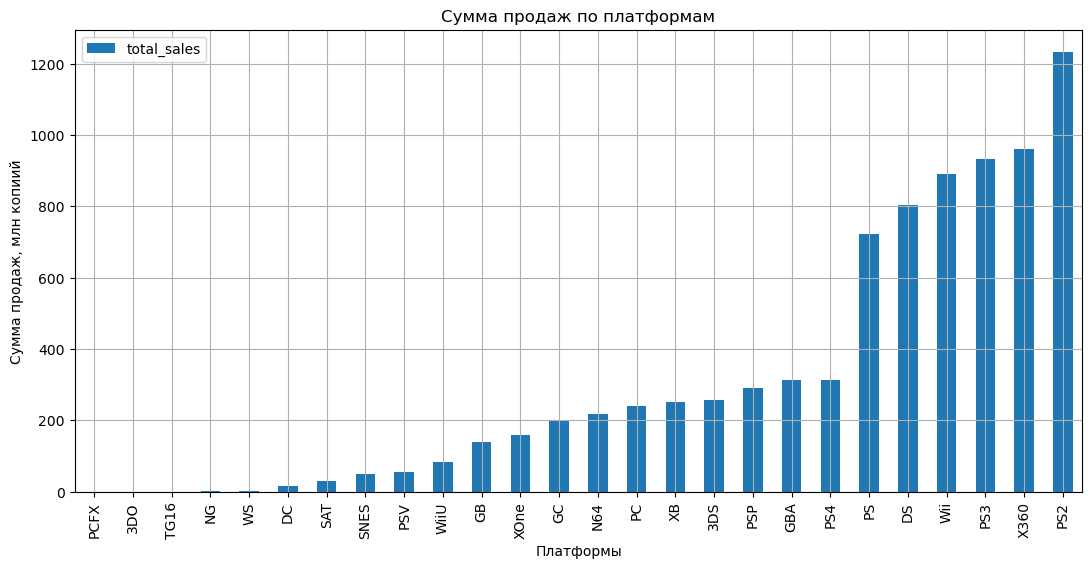

In [16]:
# Создаем список платформ по кол-ву продаж
platforms_by_sales = (new_games
                      .pivot_table(index='platform', 
                                   values='total_sales', 
                                   aggfunc='sum')
                      .sort_values(by='total_sales')
 
)

# выводим популярные платформы где общая сумма проданных копий больше 100 млн
platforms = platforms_by_sales.query('total_sales > 100').index

# сделаем график продаж по платформам
platforms_by_sales.plot(kind='bar', 
                        title='Сумма продаж по платформам', 
                        ylabel='Сумма продаж, млн копиий', 
                        xlabel='Платформы', 
                        figsize=(13, 6), 
                        grid=True
                       )


<AxesSubplot:title={'center':'Популярность платформ по годам'}, xlabel='Платформы', ylabel='Год'>

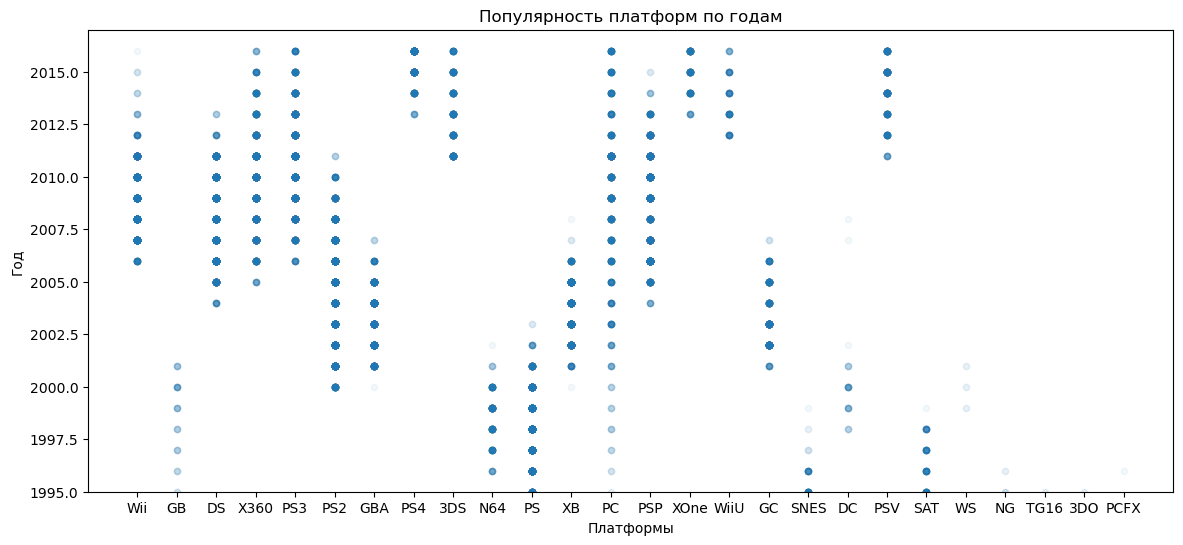

In [17]:
# Смотрим популярность платформ по годам
display(new_games
 .plot(y='year_of_release', 
       x='platform', 
       kind='scatter', 
       title='Популярность платформ по годам', 
       xlabel='Платформы', 
       ylabel='Год', 
       figsize=(14, 6), 
       alpha=0.05, 
       ylim=(1995, 2017))
)



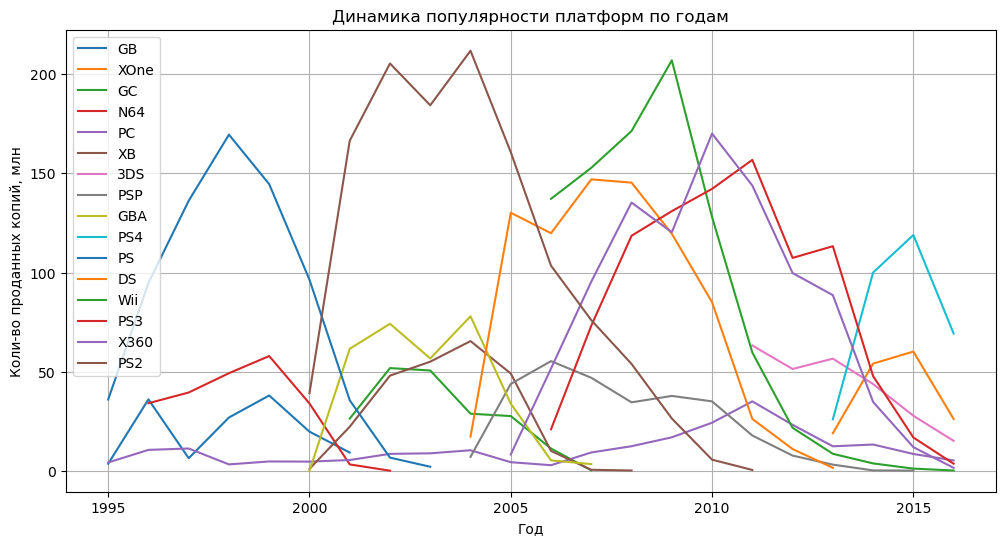

In [18]:
# график популярности платформ по годам
for plat in platforms:
    data_tmp = (new_games
                .loc[new_games['platform'] == plat]
                .groupby('year_of_release')['total_sales']
                .sum())
    
    data_tmp.name=plat
    
    data_tmp.plot(legend=True, 
                  grid=True, 
                  figsize=(12, 6), 
                  title='Динамика популярности платформ по годам', 
                  xlabel='Год', 
                  ylabel='Коли-во проданных копий, млн')

<div style="border:solid black 5px; padding: 10px">
   
<font size="4"><b>Вывод:</b></font>

* Самыми популярными платформами за 1995-2016 являются `['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']`;
* Среднее время "жизни" платформы 9-10 лет;
* Актуальный период для исследования нужно взять с 2013 года, так как появились новые платформы и устаревшие начали пропадать;
* Надо пересмотреть популярность платформ за актуальный период.


**Обработка данных по актуальному периоду**

In [19]:
# создаем новую таблицу с актуальными данными
actual_data = data.loc[data['year_of_release'] > 2012]



<AxesSubplot:title={'center':'Сумма продаж по платформам'}, xlabel='Платформы', ylabel='Сумма продаж, млн копиий'>

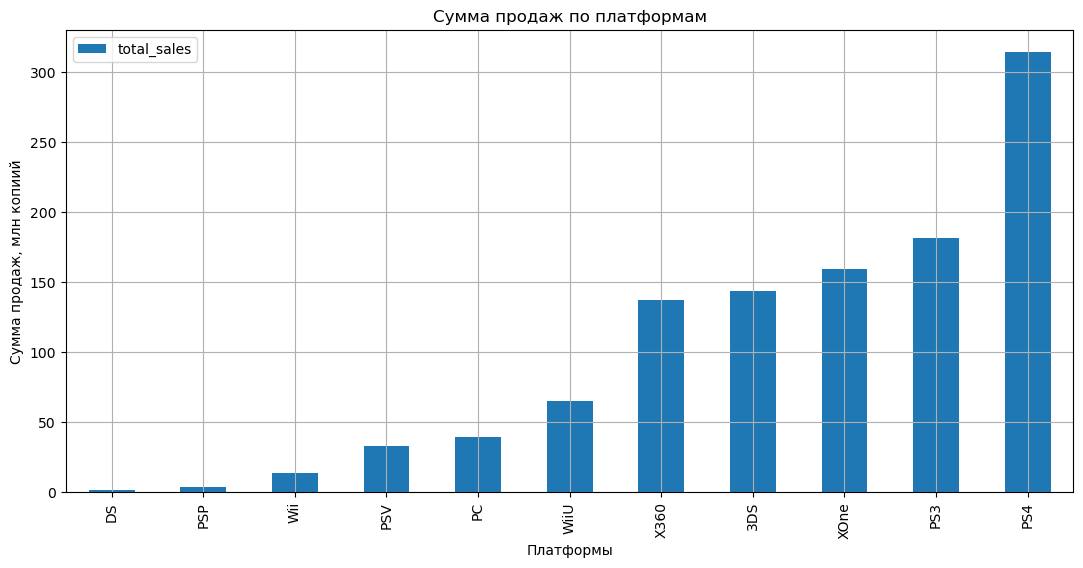

In [20]:
# Создаем список платформ по продажам
platforms_by_sales = (actual_data
                      .pivot_table(index='platform', 
                                   values='total_sales', 
                                   aggfunc='sum')
                      .sort_values(by='total_sales')
 
)



# сделаем график продаж по платформам
platforms_by_sales.plot(kind='bar', 
                        title='Сумма продаж по платформам', 
                        ylabel='Сумма продаж, млн копиий', 
                        xlabel='Платформы', 
                        figsize=(13, 6), 
                        grid=True
                       )


<AxesSubplot:title={'center':'Популярность платформ по годам'}, xlabel='Платформы', ylabel='Год'>

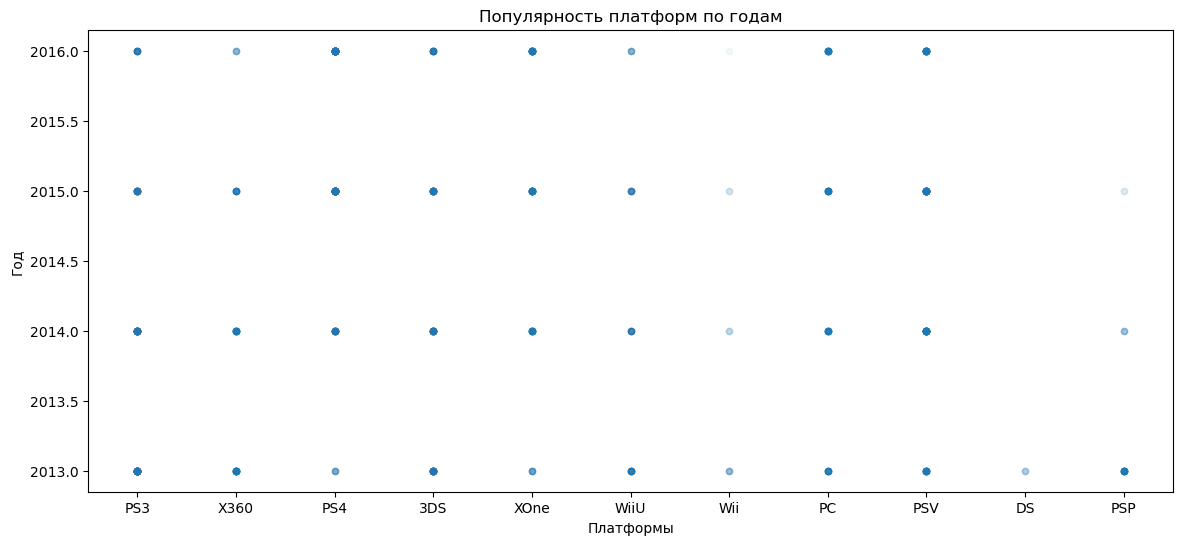

In [21]:
# Смотрим популярность платформ по годам
display(actual_data
        .plot(y='year_of_release', 
              x='platform', 
              kind='scatter', 
              title='Популярность платформ по годам', 
              xlabel='Платформы', 
              ylabel='Год', 
              figsize=(14, 6), 
              alpha=0.05)
)



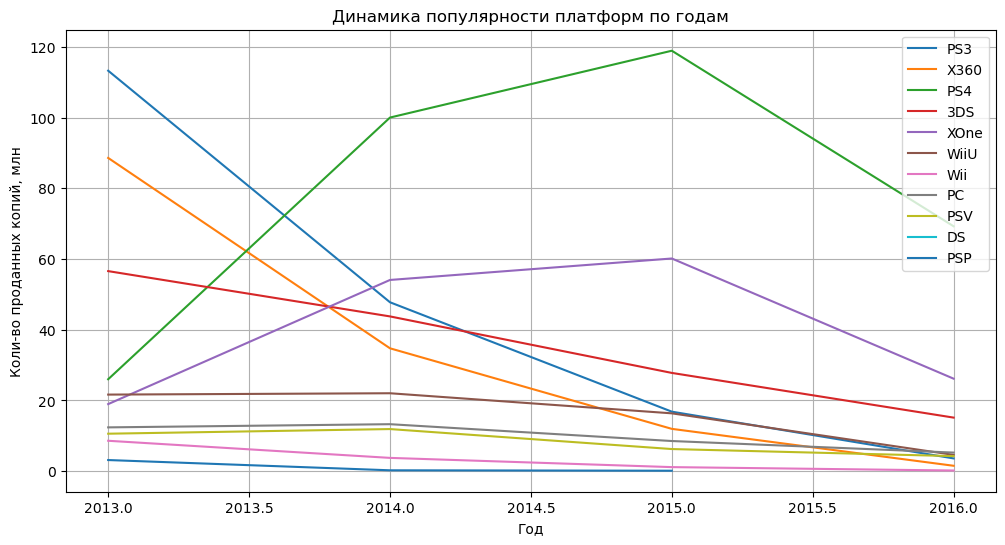

In [22]:
# график популярности платформ за актуальный период
for plat in actual_data['platform'].unique():
    data_tmp = (actual_data
                .loc[actual_data['platform'] == plat]
                .groupby('year_of_release')['total_sales']
                .sum())
    
    data_tmp.name=plat
    
    data_tmp.plot(legend=True, 
                  grid=True, 
                  figsize=(12, 6), 
                  title='Динамика популярности платформ по годам', 
                  xlabel='Год', 
                  ylabel='Коли-во проданных копий, млн')

Text(0.9, 1.1, 'Диаграмма размаха по популярным платформам')

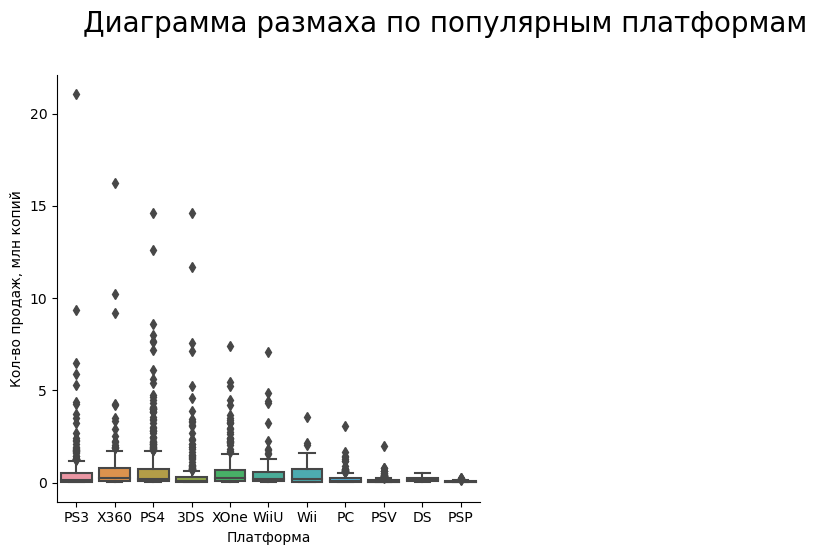

In [23]:
# создаем диаграмму размаха по популярным платформам
(sns.catplot(data=actual_data,
             x='platform', 
             y='total_sales', 
             kind='box')
 .set_axis_labels("Платформа", "Кол-во продаж, млн копий")
 .fig.suptitle('Диаграмма размаха по популярным платформам', verticalalignment='top', fontsize=20, x=0.9, y=1.1)

)


Text(0.9, 1.1, 'Диаграмма размаха по популярным платформам')

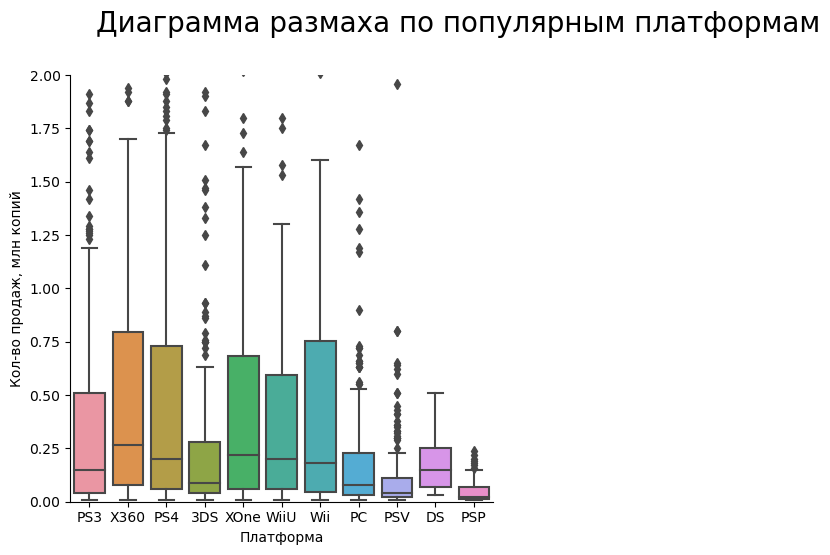

In [24]:
# создаем диаграмму размаха по популярным платформам
(sns.catplot(data=actual_data, 
             x='platform', 
             y='total_sales', 
             kind='box')
 .set(ylim=(0, 2))
 .set_axis_labels("Платформа", "Кол-во продаж, млн копий")
 .fig.suptitle('Диаграмма размаха по популярным платформам', fontsize=20, x=0.9, y=1.1)

)


<div style="border:solid black 5px; padding: 10px">
   
<font size="4"><b>Вывод:</b></font>
* Самыми популярными платформами за акутальный период являются `['PS4', 'XOne', 'PS3', 'X360', '3DS']`;
* Большую популярность набрали новые `PS4` и `XOne` сместив других конкурентов;
* По диаграмме размаха следует, что медианное распределение продаж игр между 100 тыс. и 250 тыс. копий;
* В целом продажи игр медленно снижаются.


### Влияние оценок и жанров на продажи

#### Оценки

`X360`:

Корреляция с оценками критиков составляет: 0.35


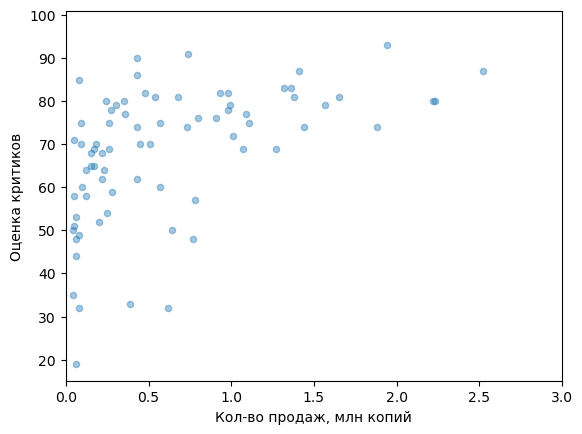

In [25]:
# создаем таблицу только с платформой X360
x360_data = actual_data.query('platform == "X360"')

# строим диаграмму рассеяния по платформе X360 и оценкам критиков
(x360_data.plot(x='total_sales', 
                y='critic_score', 
                kind='scatter', 
                alpha=0.4, 
                xlabel='Кол-во продаж, млн копий', 
                ylabel='Оценка критиков', 
                xlim=(0, 3)
               )
)

# напечатаем корреляцию
print(f'Корреляция с оценками критиков составляет: {x360_data["total_sales"].corr(x360_data["critic_score"]):.2f}')


Корреляция с оценками пользователей составляет: -0.01


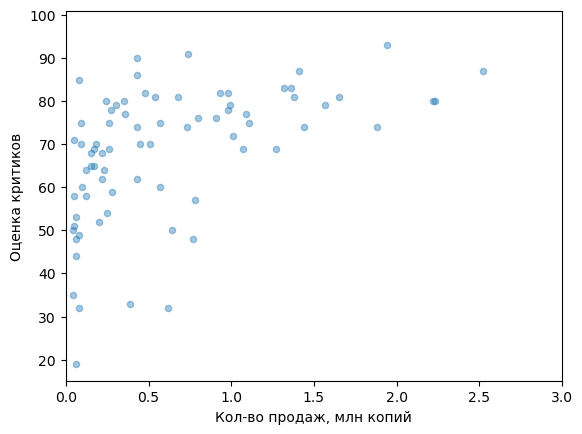

In [26]:
# строим диаграмму рассеяния по платформе X360 и оценкам пользователей
(x360_data
 .plot(x='total_sales', 
       y='critic_score', 
       kind='scatter', 
       alpha=0.4, 
       xlabel='Кол-во продаж, млн копий', 
       ylabel='Оценка критиков', 
       xlim=(0, 3))
)

# напечатаем корреляцию
print(f'Корреляция с оценками пользователей составляет: {x360_data["total_sales"].corr(x360_data["user_score"]):.2f}')


`PS4`

Корреляция с оценками критиков составляет: 0.41


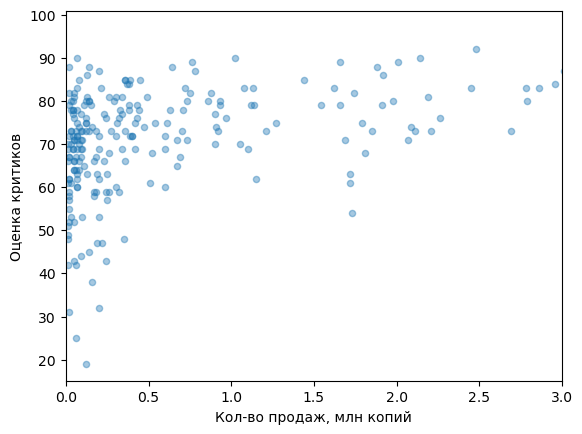

In [27]:
# создаем таблицу только с платформой PS4
ps4_data = actual_data.query('platform == "PS4"')

# строим диаграмму рассеяния по платформе PS4 и оценкам критиков
(ps4_data
 .plot(x='total_sales', 
       y='critic_score', 
       kind='scatter', 
       alpha=0.4, 
       xlabel='Кол-во продаж, млн копий', 
       ylabel='Оценка критиков', 
       xlim=(0, 3))
)

# напечатаем корреляцию
print(f'Корреляция с оценками критиков составляет: {ps4_data["total_sales"].corr(ps4_data["critic_score"]):.2f}')


Корреляция с оценками пользователей составляет: -0.03


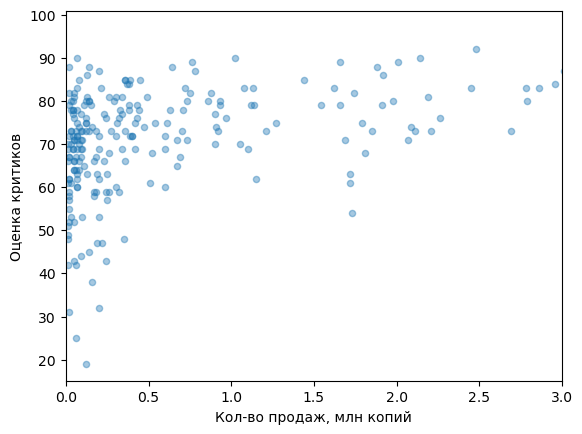

In [28]:
# строим диаграмму рассеяния по платформе ps4_data и оценкам пользователей
(ps4_data
 .plot(x='total_sales', 
       y='critic_score', 
       kind='scatter', 
       alpha=0.4, 
       xlabel='Кол-во продаж, млн копий', 
       ylabel='Оценка критиков', 
       xlim=(0, 3))
)

# напечатаем корреляцию
print(f'Корреляция с оценками пользователей составляет: {ps4_data["total_sales"].corr(ps4_data["user_score"]):.2f}')

`XOne`

Корреляция с оценками критиков составляет: 0.42


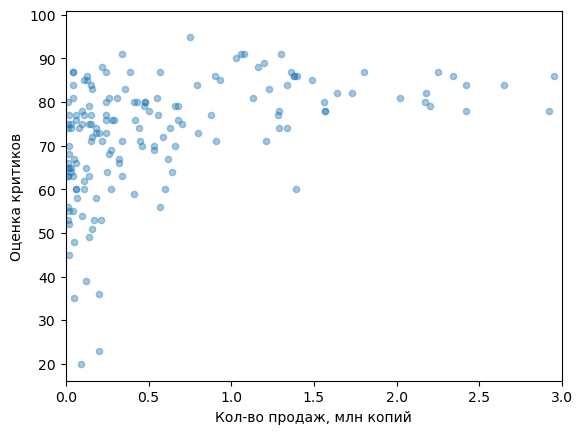

In [29]:
# создаем таблицу только с платформой XOne
xone_data = actual_data.query('platform == "XOne"')

# строим диаграмму рассеяния по платформе XOne и оценкам критиков
(xone_data
 .plot(x='total_sales', 
       y='critic_score', 
       kind='scatter', 
       alpha=0.4, 
       xlabel='Кол-во продаж, млн копий', 
       ylabel='Оценка критиков', 
       xlim=(0, 3))
)

# напечатаем корреляцию
print(f'Корреляция с оценками критиков составляет: {xone_data["total_sales"].corr(xone_data["critic_score"]):.2f}')


Корреляция с оценками пользователей составляет: -0.07


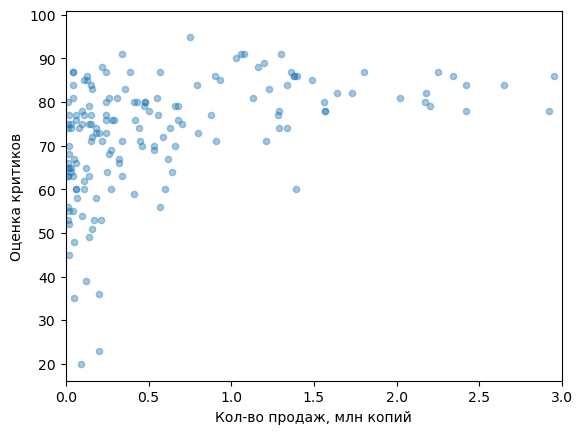

In [30]:
# строим диаграмму рассеяния по платформе XOne и оценкам пользователей
(xone_data
 .plot(x='total_sales', 
       y='critic_score', 
       kind='scatter', 
       alpha=0.4, 
       xlabel='Кол-во продаж, млн копий', 
       ylabel='Оценка критиков', 
       xlim=(0, 3))
)

# напечатаем корреляцию
print(f'Корреляция с оценками пользователей составляет: {xone_data["total_sales"].corr(xone_data["user_score"]):.2f}')

`Общая`

Корреляция с оценками критиков составляет: 0.31


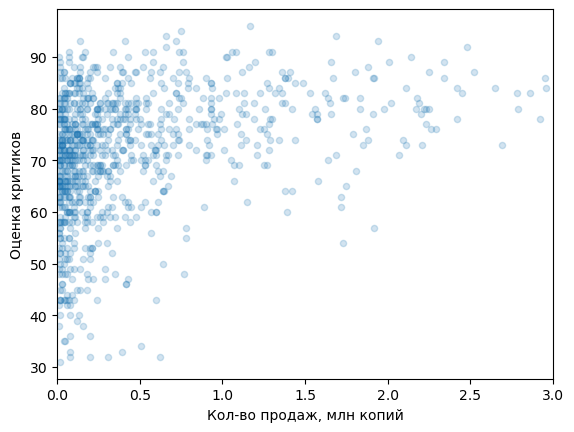

In [31]:
# строим общую диаграмму рассеяния по платформам и оценкам критиков
(actual_data
 .query('critic_score > 30 and total_sales <= 3')
 .plot(x='total_sales', 
       y='critic_score', 
       kind='scatter', 
       alpha=0.2, 
       xlabel='Кол-во продаж, млн копий', 
       ylabel='Оценка критиков', 
       xlim=(0, 3))
)

# напечатаем корреляцию
print(f'Корреляция с оценками критиков составляет: {actual_data["total_sales"].corr(actual_data["critic_score"]):.2f}')

Корреляция с оценками пользователей составляет: -0.07


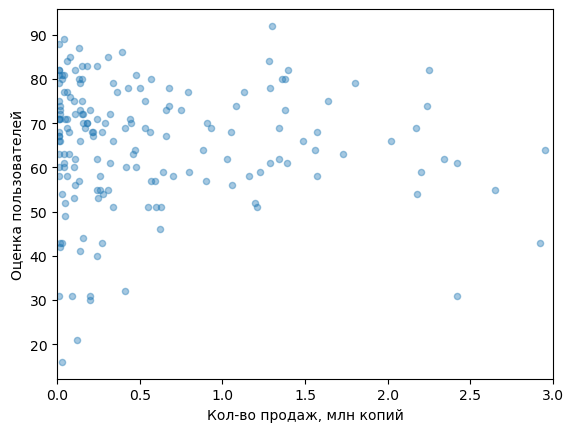

In [32]:
# строим общую диаграмму рассеяния по платформам и оценкам пользователей
(xone_data
 .plot(x='total_sales', 
       y='user_score', 
       kind='scatter', 
       alpha=0.4, 
       xlabel='Кол-во продаж, млн копий', 
       ylabel='Оценка пользователей', 
       xlim=(0, 3))
);

# напечатаем корреляцию
print(f'Корреляция с оценками пользователей составляет: {xone_data["total_sales"].corr(xone_data["user_score"]):.2f}')

<div style="border:solid black 5px; padding: 10px">
   
<font size="4"><b>Вывод:</b></font>

* Отзывы критиков вляиют на продажи игр, корреляция составляет около 42% на популярных платформах и 33% по обобщенным данным;
* Отзыва ползователей никак не влияют на продажи, корреляция близка к 0, в некоторых случаях даже отрицательная;
* Можно сказать, что игры с высокими оценками будут тажке хоршо продаваться и в 2017 году.

#### Жанры

<AxesSubplot:title={'center':'Популярность жанров'}, xlabel='Жанры', ylabel='Кол-во проданных игр, млн копий'>

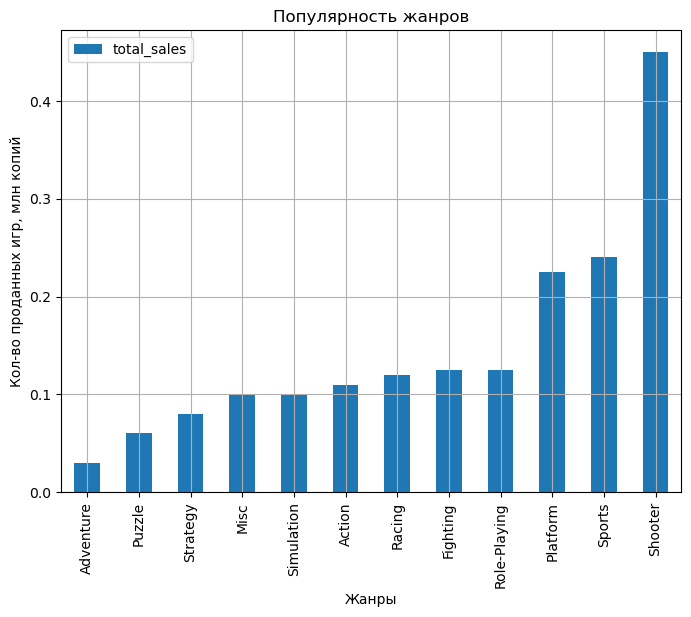

In [33]:
# строим сводную таблицу по жанрам
actual_genre = (actual_data
                .pivot_table(index='genre', 
                             values='total_sales', 
                             aggfunc='median')
                .sort_values(by='total_sales'))
actual_genre.plot(kind='bar', 
                  title='Популярность жанров', 
                  xlabel='Жанры', 
                  ylabel='Кол-во проданных игр, млн копий', 
                  figsize=(8, 6), 
                  grid=True
                 )

<div style="border:solid black 5px; padding: 10px">
   
<font size="4"><b>Вывод:</b></font>
    
* Самыми популярными жанрами обобщенно в мире являются стрелялки, игры в жанре спорта и платформеры;
* Наименее популярными являюся игры в жанрах пазл, приключения и misc.

## Предпочтения каждого региона

### Северная Америка (NA)

#### Популярные платформы в Северной Америке

<AxesSubplot:title={'center':'Популярность платформ в Северной Америке'}, xlabel='Платформы', ylabel='Продано копий, млн'>

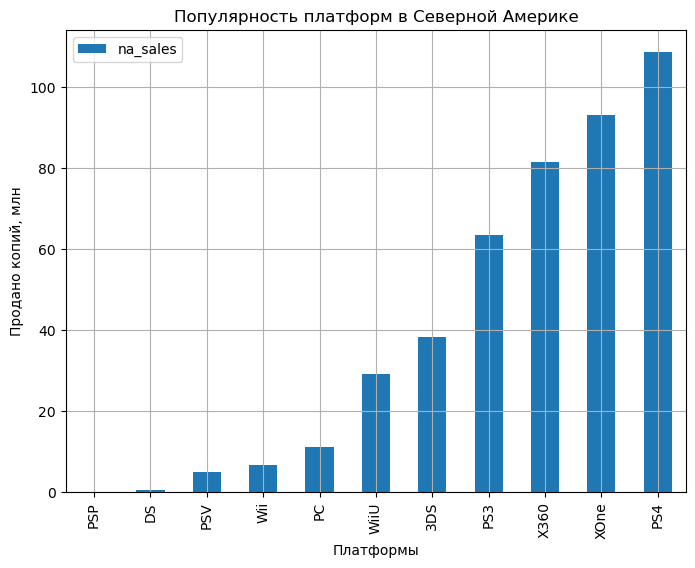

In [34]:
# создадим переменную для поиска популярных платформ в Сев. Америке
na_platforms = (actual_data
                      .pivot_table(index='platform', 
                                   values='na_sales', 
                                   aggfunc='sum')
                      .sort_values(by='na_sales')
 
)

# строим график 
na_platforms.plot(kind='bar', 
                  title='Популярность платформ в Северной Америке', 
                  xlabel='Платформы', 
                  ylabel='Продано копий, млн', 
                  grid=True, 
                  figsize=(8, 6)
                 )

**ТОП 5 платформ**

1. PS4
2. XOne
4. X360
5. PS3
5. 3DS

#### Популярные жанры в Северной Америке

<AxesSubplot:title={'center':'Популярность жанров в Северной Америке'}, xlabel='Жанры', ylabel='Продано копий, млн'>

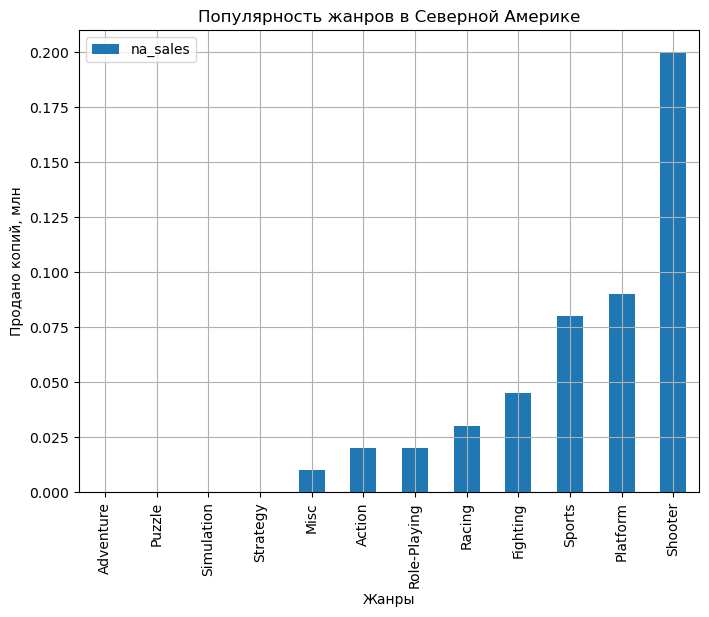

In [35]:
# создадим переменную для поиска популярных жанров в Сев. Америке
na_genre = (actual_data
                      .pivot_table(index='genre', 
                                   values='na_sales', 
                                   aggfunc='median')
                      .sort_values(by='na_sales')
 
)

# строим график 
na_genre.plot(kind='bar', 
                  title='Популярность жанров в Северной Америке', 
                  xlabel='Жанры', 
                  ylabel='Продано копий, млн', 
                  grid=True, 
                  figsize=(8, 6)
                 )

**ТОП 5 жанров в Северной Америке**

1. Shooter
2. Platform
3. Sports
4. Fighting
5. Racing

#### Влияение возрастного рейтинга на продажи в Северной Америке

<AxesSubplot:xlabel='rating'>

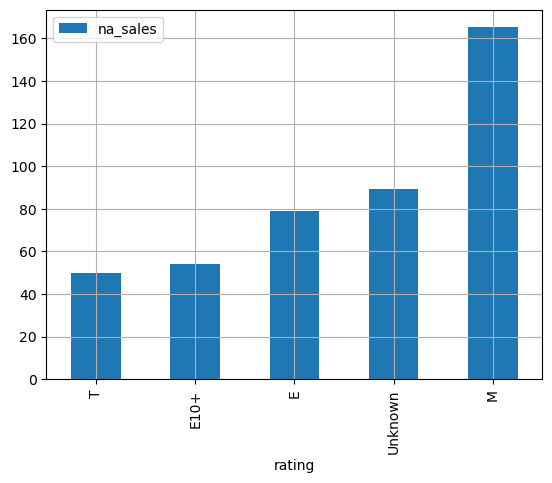

In [36]:
# создаем сводную таблицу по рейтингам в Северной Америке
na_rating = (actual_data
             .pivot_table(index='rating', 
                          values='na_sales', 
                          aggfunc='sum')
             .sort_values('na_sales')
            )
na_rating.plot(kind='bar', grid=True)

<div style="border:solid black 5px; padding: 10px">
   
<font size="4"><b>Вывод:</b></font>

* В Северной Америке популярностью пользуются игры с рейтингом +17;
* На втором месте рейтиг +0;
* Нет продаж игр +18;


### Европа (EU)

#### Популярные платформы в Европе

<AxesSubplot:title={'center':'Популярность платформ в Европе'}, xlabel='Платформы', ylabel='Продано копий, млн'>

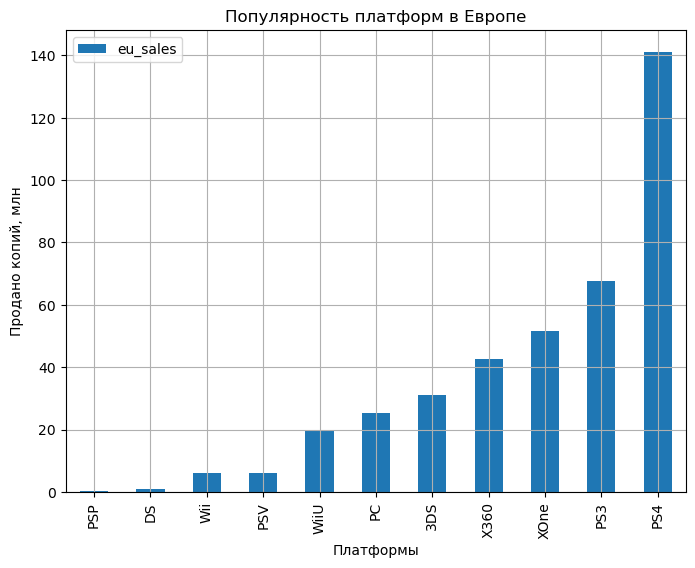

In [37]:
# создадим переменную для поиска популярных платформ в Европа
eu_platforms = (actual_data
                      .pivot_table(index='platform', 
                                   values='eu_sales', 
                                   aggfunc='sum')
                      .sort_values(by='eu_sales')
 
)

# строим график 
eu_platforms.plot(kind='bar', 
                  title='Популярность платформ в Европе', 
                  xlabel='Платформы', 
                  ylabel='Продано копий, млн', 
                  grid=True, 
                  figsize=(8, 6)
                 )

**ТОП 5 Платформ в Европе**

1. PS4
2. PS3
3. X360
4. 3DS
5. PC

#### Популярные жанры в Европе

<AxesSubplot:title={'center':'Популярность жанров в Европе'}, xlabel='Жанры', ylabel='Продано копий, млн'>

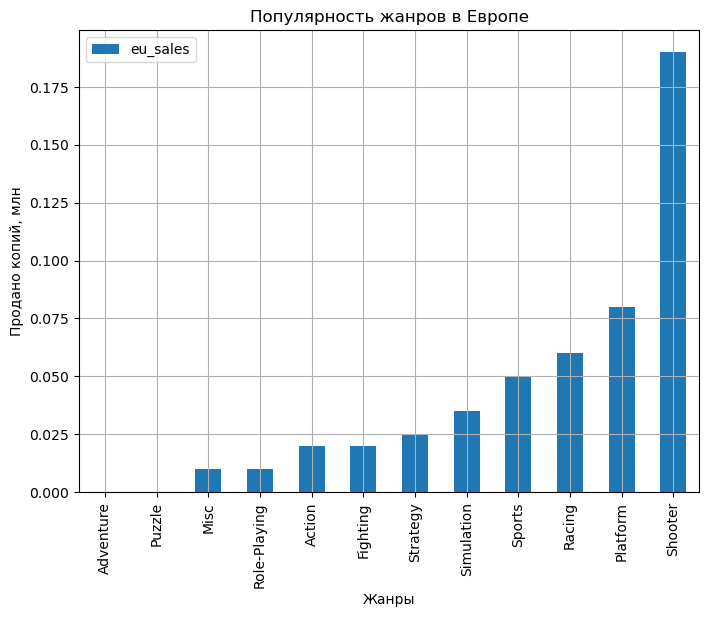

In [38]:
# создадим переменную для поиска популярных жанров в Европе
eu_genre = (actual_data
                      .pivot_table(index='genre', 
                                   values='eu_sales', 
                                   aggfunc='median')
                      .sort_values(by='eu_sales')
 
)

# строим график 
eu_genre.plot(kind='bar', 
                  title='Популярность жанров в Европе', 
                  xlabel='Жанры', 
                  ylabel='Продано копий, млн', 
                  grid=True, 
                  figsize=(8, 6)
                 )

**ТОП 5 жанров в Европе**

1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

#### Влияение возрастного рейтинга на продажи в Европе

<AxesSubplot:xlabel='rating'>

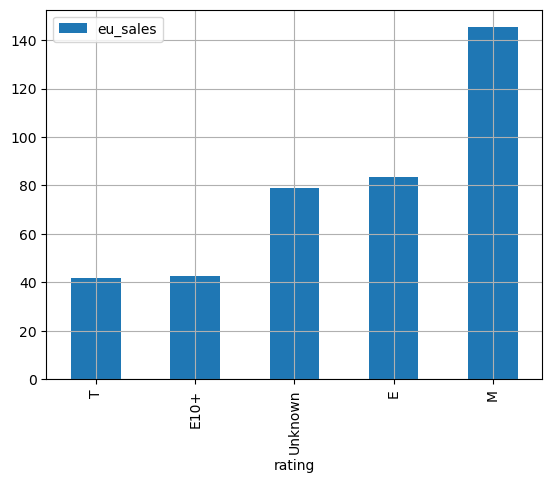

In [39]:
# создаем сводную таблицу по рейтингам в Европе
eu_rating = (actual_data
             .pivot_table(index='rating', 
                          values='eu_sales', 
                          aggfunc='sum')
             .sort_values('eu_sales')
            )
eu_rating.plot(kind='bar', grid=True)

<div style="border:solid black 5px; padding: 10px">
   
<font size="4"><b>Вывод:</b></font>

* В Европе популярностью пользуются игры с рейтингом +17;
* На втором месте рейтиг +0;
* Нет продаж игр +18;

### Япония (JP)

#### Популярные платформы в Японии

<AxesSubplot:title={'center':'Популярность платформ в Японии'}, xlabel='Платформы', ylabel='Продано копий, млн'>

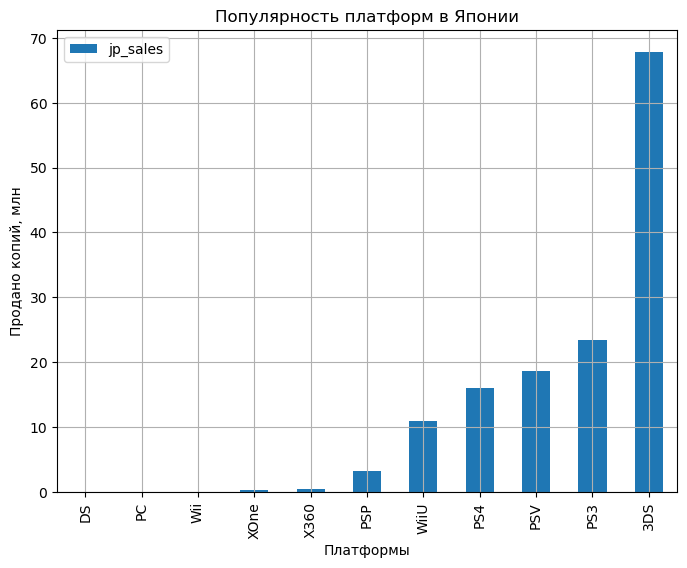

In [40]:
# создадим переменную для поиска популярных платформ в Европа
jp_platforms = (actual_data
                      .pivot_table(index='platform', 
                                   values='jp_sales', 
                                   aggfunc='sum')
                      .sort_values(by='jp_sales')
 
)

# строим график 
jp_platforms.plot(kind='bar', 
                  title='Популярность платформ в Японии', 
                  xlabel='Платформы', 
                  ylabel='Продано копий, млн', 
                  grid=True, 
                  figsize=(8, 6)
                 )

**ТОП 5 платформ в Японии**

1. 3DS
2. PS3
3. PSP
4. PSV
5. PS4

#### Популярные жанры в Японии

<AxesSubplot:title={'center':'Популярность жанров в Японии'}, xlabel='Жанры', ylabel='Продано копий, млн'>

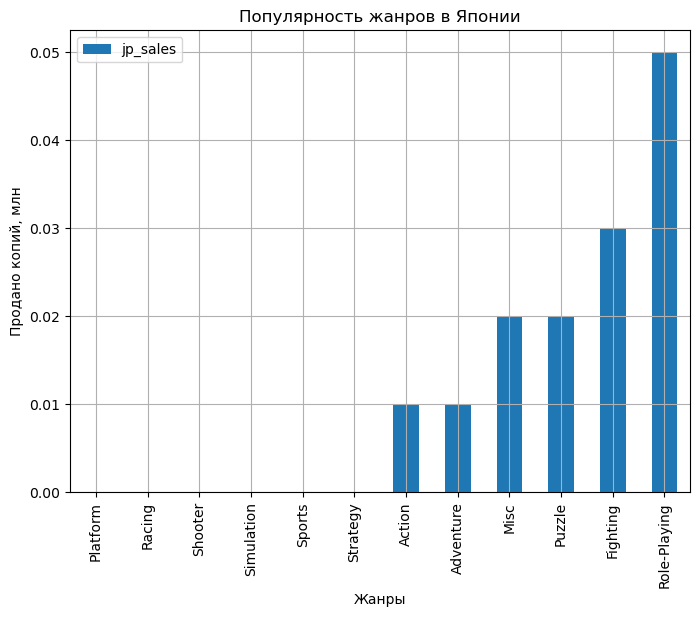

In [41]:
# создадим переменную для поиска популярных жанров в Японии
jp_genre = (actual_data
                      .pivot_table(index='genre', 
                                   values='jp_sales', 
                                   aggfunc='median')
                      .sort_values(by='jp_sales')
 
)

# строим график 
jp_genre.plot(kind='bar', 
                  title='Популярность жанров в Японии', 
                  xlabel='Жанры', 
                  ylabel='Продано копий, млн', 
                  grid=True, 
                  figsize=(8, 6)
                 )

**ТОП 5 жанров в Японии**

1. Role-Playing
2. Action
3. Misc
4. Fighting
5. Platform

#### Влияение возрастного рейтинга на продажи в Японии

<AxesSubplot:xlabel='rating'>

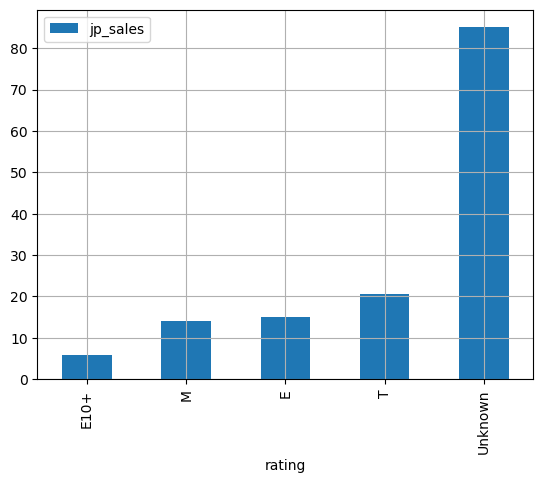

In [42]:
# создаем сводную таблицу по рейтингам в Японии
jp_rating = (actual_data
             .pivot_table(index='rating', 
                          values='jp_sales', 
                          aggfunc='sum')
             .sort_values('jp_sales')
            )
jp_rating.plot(kind='bar', grid=True)

<div style="border:solid black 5px; padding: 10px">
   
<font size="4"><b>Вывод:</b></font>

* В Японии большой поулярностью пользуются игры маркированные для США и Канады;
* На втором месте с сильным отрываом игры для подростков; 
* Игр 18+ нет;


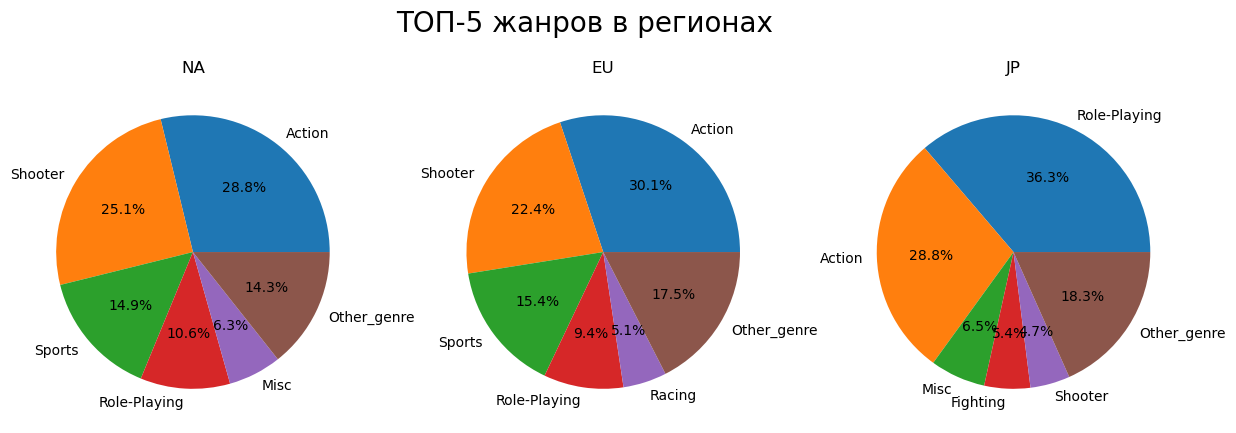

In [43]:
# Комментарий ревьюера 2
games_fresh = actual_data.copy()
countries = games_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах', fontsize=20)
for i in range(3):
  # выберем 5 самых продающих жанров
  df_i = (games_fresh.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в другие жанры
  df_i = df_i.append({'genre': 'Other_genre', 
                      countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, 
                     ignore_index=True
                    )
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

0 0.0


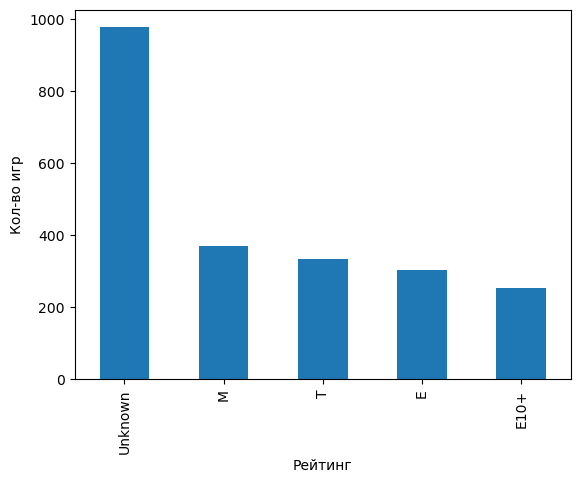

In [44]:
# Посмотрим на соотношение кол-ва игра по рейтингам
temp = actual_data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts().plot(kind='bar')
plt.xlabel('Рейтинг')
plt.ylabel('Кол-во игр');

<div style="border:solid black 5px; padding: 10px">
   
<font size="4"><b>Портреты игроков по регионам:</b></font>


`Северная Америка`:

* Предпочитают PS4 от PlayStation;
* Любят играть в стрелялки  и платформеры;
* Популярны игры с рейтингом 17+.

`Европа`:

* В Европе также предпочитают PS4 от PlayStation;
* Так же как и Американцы любят играть в стрелялки  и платформеры;
* Аналогично предпочитают игры с рейтингом 17+.

`Япония`:

* Большой популярностью пользуется консоль 3DS от Nintendo, а на втором месте консоль предыдущего поколонеия PS3;
* Жанры предпочитают ролевые-игры и драки;
* В Японии большое предпочтение  отдают играм с маркировкой для США и Канады;
* 17+ игры на 4-м месте.


## Проверка гипотез

```
H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые`
H_a: Средние пользовательские рейтинги платформ Xbox One и PC НЕ одинаковые`
alpha = 0.05
```

In [45]:
# проверяем гипотезу
res = st.ttest_ind(
    actual_data.loc[(actual_data['platform'] =='XOne') & (~actual_data['user_score'].isna()), 'user_score'], 
    actual_data.loc[(actual_data['platform'] =='PC') & (~actual_data['user_score'].isna()), 'user_score'], 
    equal_var=False)


alpha = 0.05

# Выводим результат анализа
print('p-значение:', res.pvalue) 

if res.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1475959401343053
Не получилось отвергнуть нулевую гипотезу


**Пояснение**

* Нулевую гипотезу сформировал по заданию, нужно было вяыснить одинаковые ли пользовательскте оценки у платформ PC и Xobox One;
* Альтернативная гипотеза получается будет двухсторонней, либо меньше либо больше;
* Использовал метод t-теста `ttest_ind` для сравнения средних значаений двух генеральных выборок. 

```
H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые`

H_a: Средние пользовательские рейтинги жанров Action и Sports разные`

alpha = 0.05
```

In [46]:
# проверяем гипотезу
res = st.ttest_ind(
    actual_data.loc[(actual_data['genre'] =='Action') & (~actual_data['user_score'].isna()), 'user_score'], 
    actual_data.loc[(actual_data['genre'] =='Sports') & (~actual_data['user_score'].isna()), 'user_score'], 
    equal_var=False)


alpha = 0.05

# Выводим результат анализа
print('p-значение:', res.pvalue) 

if res.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.446003970070494e-20
Отвергаем нулевую гипотезу


**Пояснение**

* Нулевая гипотеза сформулирована по заданию нкжно проверить одинаковые ли пользовательские оценки по жанрам Action и Sports;
* Альтернативная гипотеза получается также будет двухсторонней, либо меньше либо больше
* Использовал метод t-теста `ttest_ind` для сравнения средних значаений двух генеральных выборок. 

## Общий вывод

<div style="border:solid black 5px; padding: 10px">

* Продажи и рост видоигр начали бурно развиваться с серидины 90х годов и продолжили рост до 2008-2009; 
* К 2010 году рост перешел в спад, пропали многие платформы;
* В целом популярны консоли от PS, однако в Японии все еще очень популрна консоль 3DS от Nintendo;
* К концу периода почти весь рынок консолей захватил Sony со своим PS4;
* Только вот в Японии все еще сохраняет большую популярность DS3 от Nintendo:
* В Европе и Америке популярность жанров повторяется, это shooter, platform и sports и т.д.
* А в Японии популярные жанры отличаются от других регионов, тут это Role-Playing, Fighting, Misc и Puzzle. 
* В Европе и Америке лидирующую позицию занимают игры с рейтингом 17+, в то время как в Японии первое место у игр без рейтинга;
* Есть средняя связб между продажами и оценками критиков, можно сказать, что высоко оцененные игры будут лучше продаваться;
* В свою очередь оценки пользователей мало влияют на продажи.

**Рекомендации**

* Для каждого региона нужно провести собственную маркетинговую компанию.
* В Америке популярностью будут пользоваться игры: с высокой оценкой критиков, с возрастным рейтингом 17+, на платформе от Sony PS4, в жанрах shooter, platform и sport .
* В Европе схожая ситуация. Популярностью будут пользоваться игры: с высокой оценкой критиков, с возрастным рейтингом 17+, на платформе от Sony PS4, в жанрах shooter, platform и racing
* В Японии популярностью будут пользоваться игры: с высокой оценкой критиков, без возрастным рейтинга от ESRB, на платформах 3DS от Nintendo и Sony, в жанрах Role-Playing, ашпрештп и Misc